Q6. Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the 
performance of clusters by changing the parameters involved in the algorithms.

In [1]:
 import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [4]:
# Normalize the data using Standardization
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
y_kmeans = kmeans.fit_predict(x_normalized)
# Evaluate KMeans clustering using accuracy score (Note: KMeans is unsupervised)
kmeans_score = accuracy_score(y, y_kmeans)
print("Accuracy Score - KMeans:", kmeans_score * 100)
 

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Accuracy Score - KMeans: 24.0


In [5]:
# Normalize the data using Standardization
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=1)
y_dbscan = dbscan.fit_predict(x_normalized)


In [6]:
dbscan_score = accuracy_score(y, y_dbscan)
print("Accuracy Score - DBSCAN:", dbscan_score*100)

Accuracy Score - DBSCAN: 0.6666666666666667


In [7]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(x)
hc_score = accuracy_score(y, y_hc)
print("Accuracy Score - Hierarchical Clustering:", hc_score*100)

Accuracy Score - Hierarchical Clustering: 23.333333333333332


Text(0.5, 1.0, 'Hierarchical Clustering')

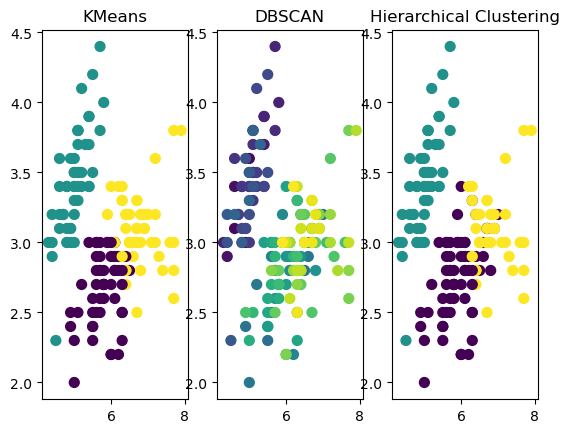

In [8]:
 plt.subplot(131)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title("KMeans")
plt.subplot(132)
plt.scatter(x[:, 0], x[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN")
plt.subplot(133)
plt.scatter(x[:, 0], x[:, 1], c=y_hc, s=50, cmap='viridis')
plt.title("Hierarchical Clustering")

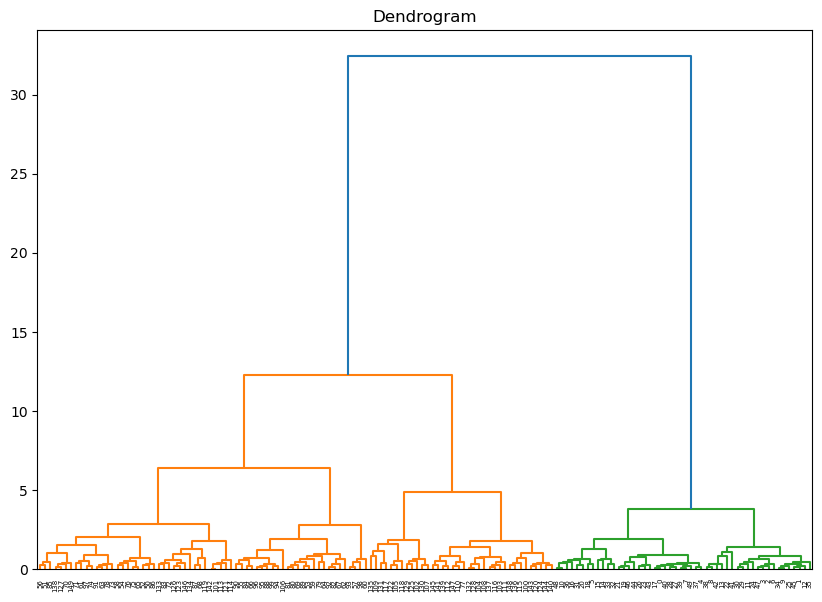

In [15]:


linked = linkage(x, 'ward') 
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top', distance_sort='descending',show_leaf_counts=True)
plt.title("Dendrogram") 
plt.show()